In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Notes
Some Key Details
- Suburb: Suburb
- Address: Address
- Rooms: Number of rooms
- Price: Price in Australian dollars
- Method:
   - S - property sold;
   - SP - property sold prior;
   - PI - property passed in;
   - PN - sold prior not disclosed;
   - SN - sold not disclosed;
   - NB - no bid;
   - VB - vendor bid;
   - W - withdrawn prior to auction;
   - SA - sold after auction;
   - SS - sold after auction price not disclosed.
   - N/A - price or highest bid not available.
- Type:
   - br - bedroom(s);
   - h - house,cottage,villa, semi,terrace;
   - u - unit, duplex;
   - t - townhouse;
   - dev site - development site;
   - o res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD in Kilometres
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size in Metres
- BuildingArea: Building Size in Metres
- YearBuilt: Year the house was built
- CouncilArea: Governing council for the area
- Lattitude: Self explanitory
- Longtitude: Self explanitory

In [9]:
df = pd.read_csv("datasets/melbourne_housing_marker/melbourne_housing_market_full.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [12]:
df.describe(include="all")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,34857,34857,34857.000000,34857,2.724700e+04,34857,34857,34857,34856.000000,34856.000000,...,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,34854,26881.000000,26881.000000,34854,34854.000000
unique,351,34009,NaN,3,NaN,9,388,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,5 Charles St,NaN,h,NaN,S,Jellis,28/10/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
freq,844,6,NaN,23980,NaN,19744,3359,1119,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3675,NaN,NaN,11836,NaN
mean,NaN,NaN,3.031012,NaN,1.050173e+06,NaN,NaN,NaN,11.184929,3116.062859,...,1.624798,1.728845,593.598993,160.25640,1965.289885,NaN,-37.810634,145.001851,NaN,7572.888306
std,NaN,NaN,0.969933,NaN,6.414671e+05,NaN,NaN,NaN,6.788892,109.023903,...,0.724212,1.010771,3398.841946,401.26706,37.328178,NaN,0.090279,0.120169,NaN,4428.090313
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.00000,1196.000000,NaN,-38.190430,144.423790,NaN,83.000000
25%,NaN,NaN,2.000000,NaN,6.350000e+05,NaN,NaN,NaN,6.400000,3051.000000,...,1.000000,1.000000,224.000000,102.00000,1940.000000,NaN,-37.862950,144.933500,NaN,4385.000000
50%,NaN,NaN,3.000000,NaN,8.700000e+05,NaN,NaN,NaN,10.300000,3103.000000,...,2.000000,2.000000,521.000000,136.00000,1970.000000,NaN,-37.807600,145.007800,NaN,6763.000000
75%,NaN,NaN,4.000000,NaN,1.295000e+06,NaN,NaN,NaN,14.000000,3156.000000,...,2.000000,2.000000,670.000000,188.00000,2000.000000,NaN,-37.754100,145.071900,NaN,10412.000000


In [38]:
print(f"Total rows: {len(df)}")
print("-------")
print("Missing values")

def find_missing_values(df, column):
    print(f"{column.ljust(15, ' ')}: {df[column].isnull().sum()}")
    
for column in list(df.columns):
    find_missing_values(df, column)

Total rows: 34857
-------
Missing values
Suburb         : 0
Address        : 0
Rooms          : 0
Type           : 0
Price          : 7610
Method         : 0
SellerG        : 0
Date           : 0
Distance       : 1
Postcode       : 1
Bedroom2       : 8217
Bathroom       : 8226
Car            : 8728
Landsize       : 11810
BuildingArea   : 21115
YearBuilt      : 19306
CouncilArea    : 3
Lattitude      : 7976
Longtitude     : 7976
Regionname     : 3
Propertycount  : 3


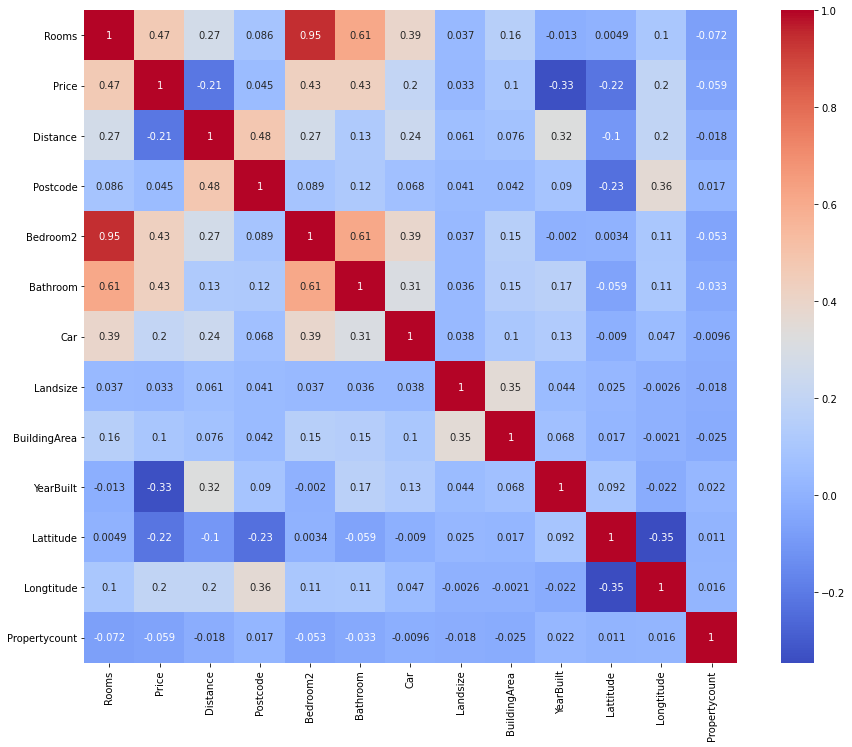

In [36]:
plt.rcParams['figure.figsize'] = (16, 12)
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm');